Accuracy: 0.79
              precision    recall  f1-score   support

           0       0.80      0.98      0.88       237
           1       0.50      0.08      0.14        64

    accuracy                           0.79       301
   macro avg       0.65      0.53      0.51       301
weighted avg       0.73      0.79      0.72       301



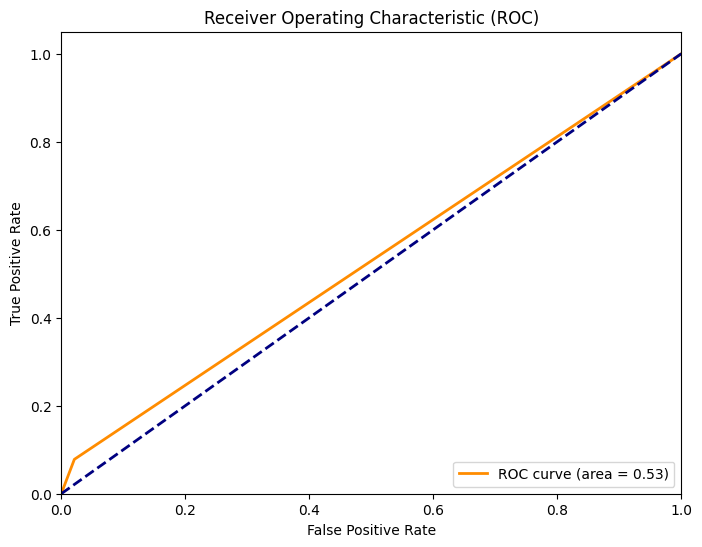

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://raw.githubusercontent.com/sunnysavita10/credit_card_pw_hindi/main/creditCardFraud_28011964_120214.csv"
df = pd.read_csv(url)

# Rename columns to remove leading/trailing spaces
df.columns = df.columns.str.strip()

# Check for missing values
df.fillna(0, inplace=True)

# Separate features and target
X = df.drop(columns=['default payment next month'])  # 'default payment next month' is the target variable
y = df['default payment next month']

# Data Pre-processing: Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Feature Selection using Extra Trees Classifier
etc = ExtraTreesClassifier(n_estimators=50, random_state=42)
etc.fit(X_scaled, y)
important_features = etc.feature_importances_

# Selecting top features using Recursive Feature Elimination (RFE)
logreg = LogisticRegression(max_iter=1000, random_state=42)
rfe = RFE(logreg, n_features_to_select=10)
X_selected = rfe.fit_transform(X_scaled, y)

# Split data into training and testing sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42, stratify=y)

# Train the model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))



# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")
plt.show()

<ipython-input-1-256447255ee9>:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0, 0], x=feature_importances, y=feature_names, hue=None, palette="viridis", legend=False)
<ipython-input-1-256447255ee9>:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0, 1], x=selected_importances, y=selected_features, hue=None, palette="coolwarm", legend=False)


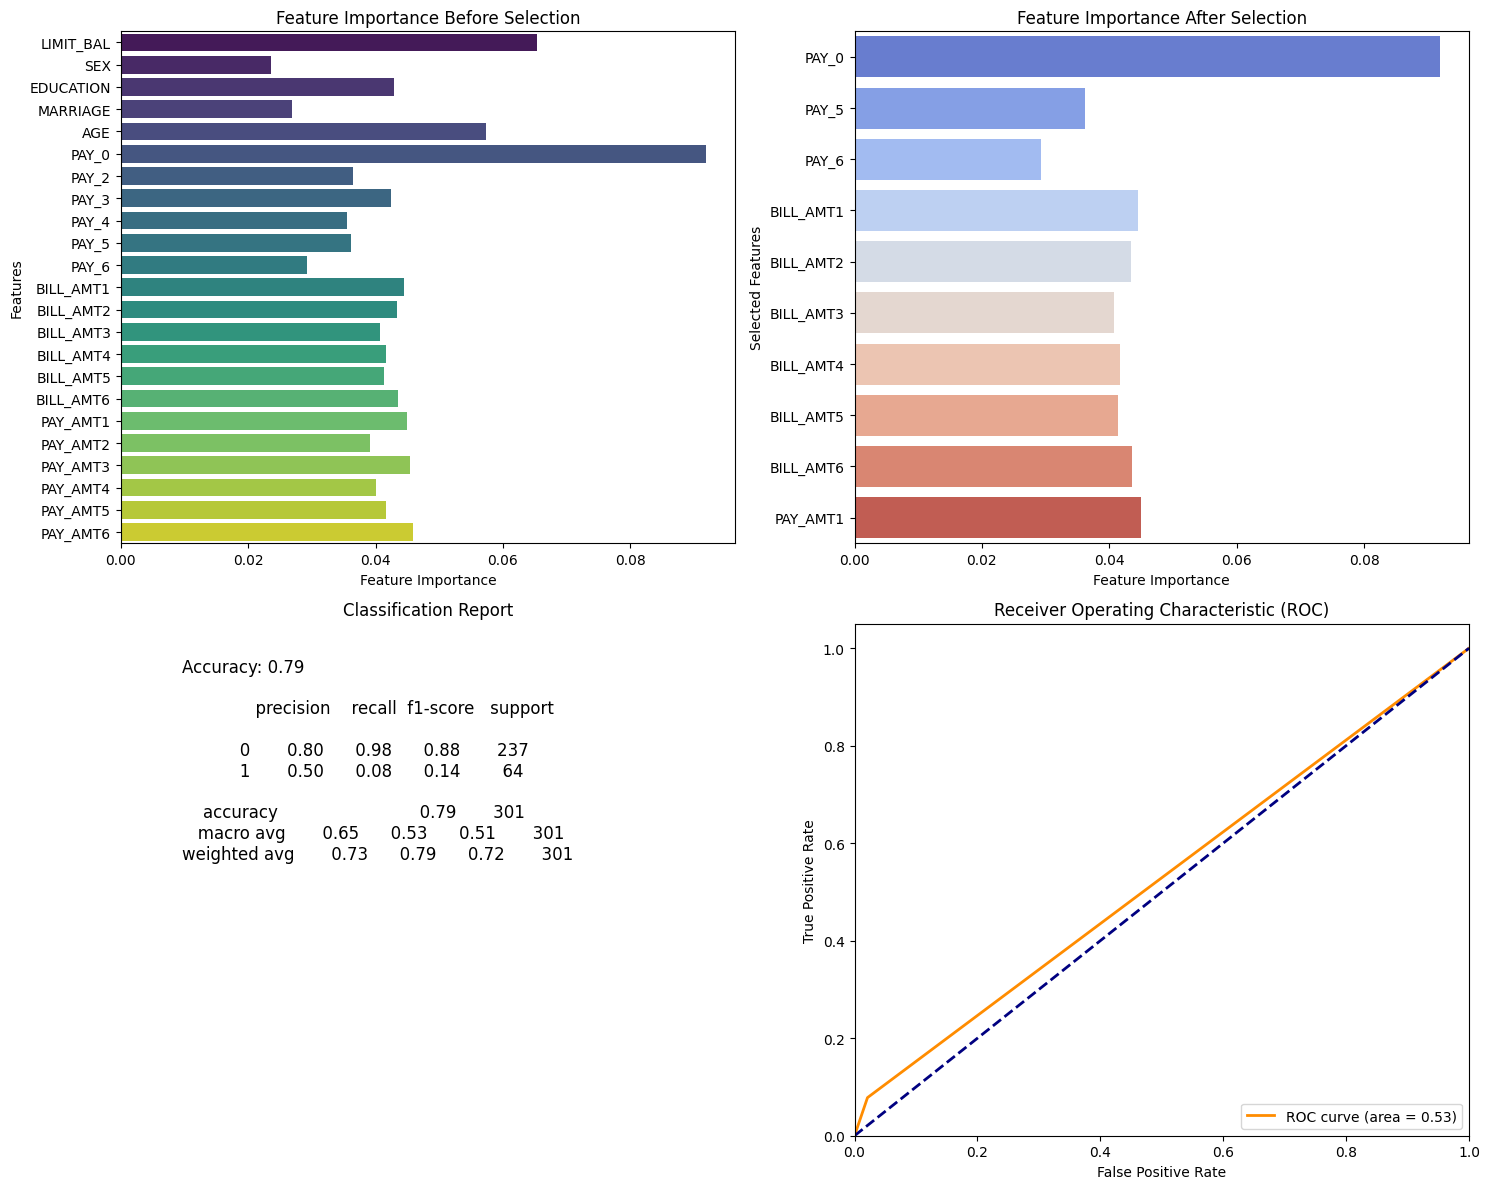

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc

url = "https://raw.githubusercontent.com/sunnysavita10/credit_card_pw_hindi/main/creditCardFraud_28011964_120214.csv"
df = pd.read_csv(url)


df.columns = df.columns.str.strip()


df.fillna(0, inplace=True)


X = df.drop(columns=['default payment next month'])
y = df['default payment next month']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


etc = ExtraTreesClassifier(n_estimators=50, random_state=42)
etc.fit(X_scaled, y)

feature_importances = etc.feature_importances_
feature_names = X.columns


logreg = LogisticRegression(max_iter=1000, random_state=42)
rfe = RFE(logreg, n_features_to_select=10)
X_selected = rfe.fit_transform(X_scaled, y)


selected_features = np.array(feature_names)[rfe.support_]
selected_importances = feature_importances[rfe.support_]


X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42, stratify=y)


model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)


fig, axes = plt.subplots(2, 2, figsize=(15, 12))


sns.barplot(ax=axes[0, 0], x=feature_importances, y=feature_names, hue=None, palette="viridis", legend=False)
axes[0, 0].set_title("Feature Importance Before Selection")
axes[0, 0].set_xlabel("Feature Importance")
axes[0, 0].set_ylabel("Features")


sns.barplot(ax=axes[0, 1], x=selected_importances, y=selected_features, hue=None, palette="coolwarm", legend=False)
axes[0, 1].set_title("Feature Importance After Selection")
axes[0, 1].set_xlabel("Feature Importance")
axes[0, 1].set_ylabel("Selected Features")


axes[1, 0].text(0.1, 0.5, f"Accuracy: {accuracy:.2f}\n\n{classification_rep}", fontsize=12)
axes[1, 0].axis("off")
axes[1, 0].set_title("Classification Report")


axes[1, 1].plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (area = %0.2f)" % roc_auc)
axes[1, 1].plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
axes[1, 1].set_xlim([0.0, 1.0])
axes[1, 1].set_ylim([0.0, 1.05])
axes[1, 1].set_xlabel("False Positive Rate")
axes[1, 1].set_ylabel("True Positive Rate")
axes[1, 1].set_title("Receiver Operating Characteristic (ROC)")
axes[1, 1].legend(loc="lower right")

plt.tight_layout()
plt.show()